In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
import nengo

factor = 100
n_neurons = 100

with nengo.Network() as model:

    stim = nengo.Node(output=lambda t: np.sin(2*np.pi*t)/100)
    
    x = nengo.Ensemble(
        n_neurons, 1,
        eval_points=nengo.dists.UniformHypersphere(surface=False).sample(n_neurons, 1) / factor,
        encoders=nengo.dists.UniformHypersphere(surface=True).sample(n_neurons, 1) * factor,
        normalize_encoders=False,
        neuron_type=nengo.LIFRate())
    
    nengo.Connection(stim, x, synapse=None)
    
    p = nengo.Probe(x)
    
with nengo.Simulator(model) as sim:
    sim.run(1.)

Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


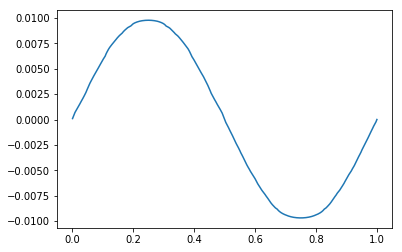

In [39]:
plot(sim.trange(), sim.data[p])
show()